In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
plt.rc('text', usetex=True)
plt.rc('font', family='Serif')

import matplotlib as mpl 
mpl.rcParams['figure.figsize'] = [10, 7]
mpl.rcParams['font.size'] = 27

mpl.rcParams['savefig.dpi'] = 150 
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['xtick.major.size'] = 10 
mpl.rcParams['xtick.minor.size'] = 5 

mpl.rcParams['ytick.major.size'] = 10 
mpl.rcParams['ytick.minor.size'] = 5 

mpl.rcParams['xtick.labelsize'] = 23
mpl.rcParams['ytick.labelsize'] = 23

In [2]:
NGC3201_path = os.getcwd()
df1 = pd.read_csv("{}/NGC3201_DRCR.dat".format(NGC3201_path),sep='\s+',names=['ID', 'F275W', 'F336W', 'F438W', 'Vvega', 'Ivega'])
df2 = pd.read_csv("{}/NGC3201artstars.dat".format(NGC3201_path),sep='\s+')

In [3]:
epsilon = 1
V_diff = []
I_diff = []
#obs_x = df1['x'].values
#obs_y = df1['y'].values
obs_V = df1['Vvega'].values
obs_I = df1['Ivega'].values
as_x = df2['#InputX'].values
as_y = df2['InputY'].values
as_V = df2['InputF606W'].values
as_I = df2['InputF814W'].values

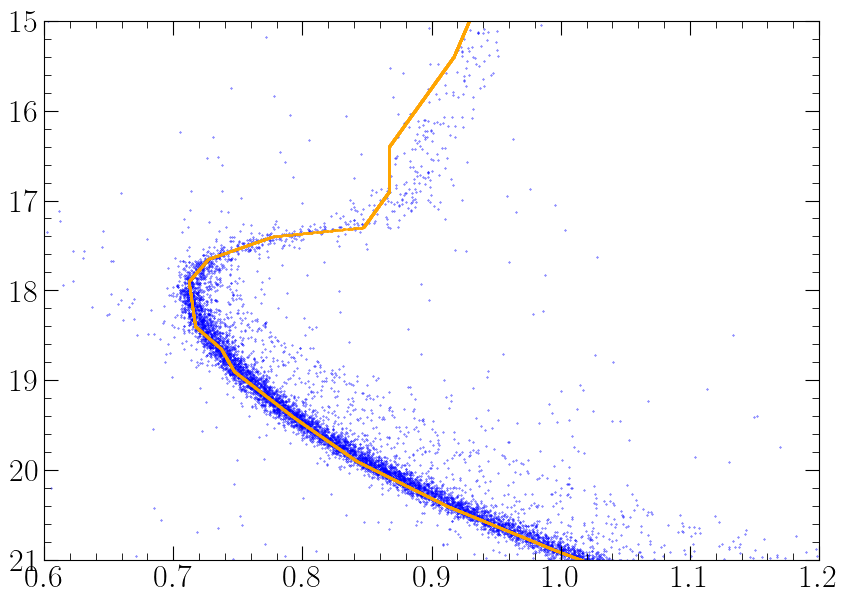

In [4]:
plt.scatter(obs_V-obs_I,obs_V,s=0.1,c='b')
V_diff=31.4
VI_diff=0.897
plt.scatter(as_V-as_I+VI_diff,as_V + V_diff,s=0.1,c='orange',alpha=0.5)
plt.ylim(15,21)
plt.xlim(0.6,1.2)
plt.gca().invert_yaxis()

In [ ]:
plt.scatter(as_V-as_I,as_V,s=0.1,c='orange',alpha=0.5)
V_SGB = 17.45
VI_SGB = 0.762
plt.scatter(VI_SGB - VI_diff, V_SGB - V_diff)
plt.gca().invert_yaxis()

In [ ]:
print("V for AS test = {}".format(V_SGB - V_diff))
print("I for AS test = {}".format(V_SGB - VI_SGB - (V_diff - VI_diff)))

In [ ]:
plt.scatter(obs_V,obs_I,s=0.1,c='b')
I_diff = V_diff-VI_diff
#VI_diff=0.737
plt.scatter(as_V+V_diff,as_I+I_diff,s=0.1,c='orange',alpha=0.5)
plt.xlim(15,19)
plt.ylim(14,19)
print("V_diff = {}".format(V_diff))
print("I_diff = {}".format(I_diff))

In [ ]:
df3 = pd.read_csv("{}/NGC3201.dat".format(NGC3201_path),sep='\s+')

In [ ]:
plt.scatter(df3['Vvega'],df3['err'],s=0.01)
plt.ylim(0,0.01)
plt.xlim(15,20)
V_long_short = 17.22
plt.axvline(x=V_long_short)

In [ ]:
plt.scatter(df3['Ivega'],df3['err.2'],s=0.01)
plt.ylim(0,0.01)
plt.xlim(15,20)
I_long_short = 16.32
plt.axvline(x=I_long_short)

In [ ]:
mag_cut = 2
fitstars_in_range = df1[(df1['Vvega'] >= V_SGB - mag_cut) & (df1['Vvega'] <= V_SGB + mag_cut) & (df1['Ivega'] < 20)]

In [ ]:
print("V_max for AS test is: {}".format(max(fitstars_in_range['Vvega'].values) - V_diff))
print("V_min for AS test is: {}".format(min(fitstars_in_range['Vvega'].values) - V_diff))
print("I_max for AS test is: {}".format(max(fitstars_in_range['Ivega'].values) - I_diff))
print("I_min for AS test is: {}".format(min(fitstars_in_range['Ivega'].values) - I_diff))
print("VI_max for AS test is: {}".format(max(fitstars_in_range['Vvega'].values - fitstars_in_range['Ivega'].values)- V_diff + I_diff))
print("VI_min for AS test is: {}".format(min(fitstars_in_range['Vvega'].values - fitstars_in_range['Ivega'].values)- V_diff + I_diff))
print("V_short_long for AS test is: {}".format(V_long_short - V_diff))
print("I_short_long for AS test is: {}".format(I_long_short - I_diff))